In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
import frozen_lake

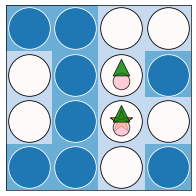

shape: (2, 2)
461 µs ± 7.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
395 µs ± 197 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


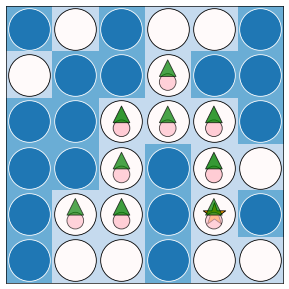

shape: (4, 4)
12.8 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
408 µs ± 319 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


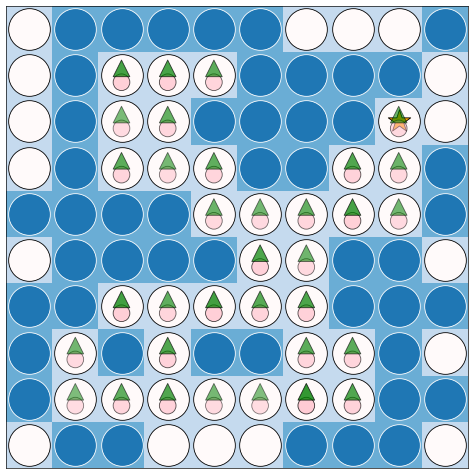

shape: (8, 8)
7.39 ms ± 54 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
363 µs ± 190 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
key = jax.random.PRNGKey(42)
for size in [2,4,8]:
    env = frozen_lake.FrozenLake.make_mango_sandbox(key, (size,size), 0.5)
    state, obs = jax.vmap(env.reset)(jax.random.split(key, 1000))
    env.render(state)

    print("shape:", (size,size))
    %timeit frozen_lake.FrozenLake.make_mango_sandbox(key, (size,size), 0.5).frozen.block_until_ready()
    %timeit env.reset(key)[1].block_until_ready()